In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [4]:
colunas = ['Class', 'Specimen Number', 'Eccentricity', 'Aspect Ratio',
           'Elongation', 'Solidity', 'Stochastic Convexity', 'Isoperimetric Factor',
           'Maximal Indentation Depth', 'Lobedness', 'Average Intensity', 'Average Contrast',
           'Smoothness', 'Third moment', 'Uniformity', 'Entropy']
        
folhas = pd.read_csv("leaf.csv", names=colunas, header=None)
folhas.head()

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [5]:
rotulos = folhas.pop('Class').values
print(rotulos)

[ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13
 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 22 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 27 28
 28 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33 33 33 34 34 34 34
 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35

In [6]:
caracteristicas = folhas.values
print(caracteristicas)

[[1.0000e+00 7.2694e-01 1.4742e+00 ... 5.2323e-03 2.7477e-04 1.1756e+00]
 [2.0000e+00 7.4173e-01 1.5257e+00 ... 2.7080e-03 7.4846e-05 6.9659e-01]
 [3.0000e+00 7.6722e-01 1.5725e+00 ... 9.2068e-04 3.7886e-05 4.4348e-01]
 ...
 [8.0000e+00 3.5344e-01 1.0329e+00 ... 1.6123e-02 4.5288e-04 1.6935e+00]
 [9.0000e+00 5.9988e-01 1.1427e+00 ... 6.1900e-03 2.6454e-04 1.1526e+00]
 [1.0000e+01 4.7195e-01 1.0901e+00 ... 1.3487e-02 3.2855e-04 1.5623e+00]]


In [12]:
floresta = RandomForestClassifier(n_estimators=50)
modelo = floresta.fit(caracteristicas, rotulos)
print(modelo)

RandomForestClassifier(n_estimators=50)


In [9]:
predicao1 = cross_val_predict(floresta, caracteristicas, rotulos, cv=10)
print(predicao1)

/home/luan/java/workspace_python/interpreters/py38/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[13  1  1  1  1  1  1 27  1 29  1  1  2  2  2 32  2 32 32  2  2 13  3 24
  3  9  3  3  3  9  3  3 30  4 27  9 24  4 24 26  5  5  5  5  5  5  5  5
  5  5  5  5 11  6  6  6  6  6  6  6  7  7  5  7  7  7 12 32  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9 10  9  9 10 30  9  9  7  9  9  9 10
 10  9 10  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 28  7 12 12 12  2 12 12 12 12 12 13 13 13  1 13 13 27 33
 13 27 33 33 13 14 14 14 28 32 28 14 22 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 12 22 28 12  5 12 22 22 22 22 22 12 23 23 23 23  6 23 23 23 23
 23 29  9 24 26 24 24 24 24  1  4 24  4 24 24  9 25 25 25 25 25 25 25 25
 13  7 26 24 26 26  4 24 22 26 26 26 26 27 27 27 27 27  2 27 27 24  1 12
 12 28 35 14 28 35 28 28 14 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30 30  9 31 31 31 34 34 31 31 31 31 31 31 32  2
 14  2 32 32  2  2 27  1  1 33 33 33 32 13 33 33 27 33 33 33 34 34 34 31
 34 34 34 34 34 34 31 35 35 35 35 35 35 35 35 35 35

In [10]:
print(len(predicao1))

340


In [6]:
score1 = cross_val_score(floresta, caracteristicas, rotulos, cv=10)
print(score1)

/home/luan/java/workspace_python/interpreters/py38/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.76470588 0.85294118 0.64705882 0.67647059 0.88235294 0.85294118
 0.58823529 0.76470588 0.82352941 0.73529412]


In [7]:
stratifiedKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
predicao2 = cross_val_predict(floresta, caracteristicas, rotulos, cv=stratifiedKFold)
print(predicao2)

/home/luan/java/workspace_python/interpreters/py38/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[13  1  1  1  1 27  1 27  1 29  1  1  2  2  2 32  2 32 32  2  2 32 25 24
  3  9  3  3  3  3  3  3 24  4  9 24 24  4 24 26  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  7  5 12  7  7  7 22 32  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9 10  9  9  9  3  9  9  7  9  9  9 10
 10  9 10  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 12 12 12 12 12  2 12 12 12 12 12 13 13 13 26 13 13 27 33
 13 26 13 33 13 14 14 14 28 32 14 14 22 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 22 22 22 12  5 22 22 22  7 22  6 22 23 23 23 23 23 23 23 23 23
 23 23 24 24 26 24 24 30 24  1 24 24 24 24 24 10 25 25 25 25 25 25 25 25
 13 32 26 24 26 26 26 24 22 26 26 26 24 27 27 27 27 27  2 27 27 33  1 28
 28 28 35 14 28 35 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30 30  9 31 31 31 34 31 31 31 31 31 31 31 32  2
 14  2 32 32  2  2 27  2  1 33 33 33  1 33 14 33 13 13 33 33 34 34 34 34
 31 34 34 34 34 34 31 35 35 12 35 35 35 28 35 35 35

In [8]:
score2 = cross_val_score(floresta, caracteristicas, rotulos, cv=stratifiedKFold)
print(score2)

/home/luan/java/workspace_python/interpreters/py38/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.82352941 0.85294118 0.79411765 0.82352941 0.88235294 0.61764706
 0.73529412 0.67647059 0.76470588 0.70588235]


In [9]:
leaveOneOut = LeaveOneOut()
predicao3 = cross_val_predict(floresta, caracteristicas, rotulos, cv=leaveOneOut)
print(predicao3)

[13  1  1  1  1  1  1 27  1 29  1  1  2 32 32 32  2 32 32  2  2 13  9 24
  3  9  3 30  3  9  3  3 24  4  4  9 24  4 24 26  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  5  7 12  7  7  7 12 32  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9 30 10  9  9 10  3  9  9  7  9  9  9 10
 10  9 10  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 28  7 12 12 12  2 12 12 12 12 12 13 13 13 33 13 13 27 33
 13 27 13 33 13 14 14 14 28 32 28 28 22 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 12 22 28 12  5 12 22 22 26  7 22 22 23 23 23 23 23 23 23 30 23
 23 23 24 24 26 24 24  9 24  1 24 24 24 24 24 25 10 25 25 25 25 25 25 25
 13 32 26 24 26 26 26 26 22 13 26 26 26 27 27 27 27 27  2 27 24 33  1 28
 12 28 28 14 28 35 12 28 14 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30 30 23 31 31 31 34 34 31 31 31 31 31 31 32  2
 32  2 32 32  2 32 13  1  1 33 33 13  1 13 33 33 27 33 33 33 34 34 34 34
 31 34 34 34 34 34 31 35 35 12 35 35 35 28 35 35 35

In [10]:
score3 = cross_val_score(floresta, caracteristicas, rotulos, cv=leaveOneOut)
print(score3)

[0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.

In [11]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
predicao4 = cross_val_predict(floresta, caracteristicas, rotulos, cv=kfold)
print(predicao4)

[13  1  1  1  1  1  1 27  1 29  1  1  2  2 32 32  2 32 32  2  2 32 25 24
  3  3  3  3  3  9  3  3 26 13 24  9  4 24 24 26  5  5  5  5  5  5  5  5
  5  5  5  5 11  6  6  6  6  6  6  6  7 22  7  7 22  7 12 32  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9 10  9  9 10 30  9  9  7  9  9  9 10
 10  9 10  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 28  7 12 12 12 22 12 12 12 12 12 13 13 13  1 33 13 27 33
 13 13 13 33 13 14 14 14 14 32 12 14 22 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 22 22 28 12  5 12 22 22 26 22 31 22 23 23 23 23 23 23 23 30 23
 23 23  9 24 26 24  4  9 24  1 24 24 26 24 24 25 25 25 25 25 25 25 25 25
 13 32 26 24 26 26 26 27 22 13 26 26 27 27 27 27 27 27  2 27 27 24  1 28
 28 35 35 28 28 35 12 28 14 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30  9  3 31 31 31 34 31 31 31 31 31 31 31 32  2
 32  2 32 32 32  2  2  2  1 33 33 33  1 13 33 33 13 13 13 33 34 34 34 31
 34 34 34 34 34 34 31 35 35 12 35 35 35 28 35 35 35

In [12]:
score4 = cross_val_score(floresta, caracteristicas, rotulos, cv=kfold)
print(score4)

[0.82352941 0.82352941 0.58823529 0.73529412 0.58823529 0.82352941
 0.79411765 0.82352941 0.76470588 0.79411765]


In [18]:
print("Floresta Randômica score medio 1: ", str(score1.mean() * 100) + ' %')
print("Floresta Randômica Acurácia (precisão média) 1: ", str(accuracy_score(rotulos, predicao1) * 100) + ' %')
print("\n")
        
print("stratifiedKFold score medio 2: ", str(score2.mean() * 100) + ' %')
print("stratifiedKFold Acurácia (precisão média) 2: ", str(accuracy_score(rotulos, predicao2) * 100) + ' %')         
print("\n")
            
print("leave-one-out score medio 3: ", str(score3.mean() * 100) + ' %')          
print("leave-one-out Acurácia (precisão média) 3: ", str(accuracy_score(rotulos, predicao3) * 100) + ' %')
print("\n")
           
print("KFold score medio 4: ", str(score4.mean() * 100) + ' %')
print("KFold Acurácia (precisão média) 4: ", str(accuracy_score(rotulos, predicao4) * 100) + ' %')         
print("\n")

Floresta Randômica score medio 1:  75.88235294117646 %
Floresta Randômica Acurácia (precisão média) 1:  76.76470588235294 %


stratifiedKFold score medio 2:  76.76470588235294 %
stratifiedKFold Acurácia (precisão média) 2:  77.64705882352942 %


leave-one-out score medio 3:  74.11764705882354 %
leave-one-out Acurácia (precisão média) 3:  73.23529411764706 %


KFold score medio 4:  75.58823529411765 %
KFold Acurácia (precisão média) 4:  73.82352941176471 %




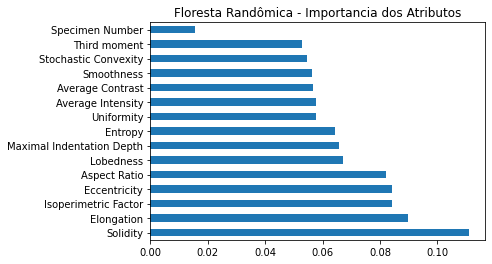

In [20]:
feat_importances = pd.Series(floresta.feature_importances_, index=folhas.columns)
feat_importances.nlargest(16).plot(kind='barh', title='Floresta Randômica - Importancia dos Atributos')
plt.show()

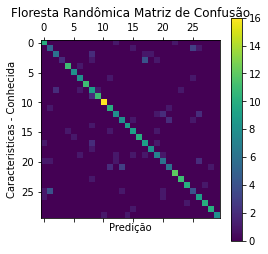

In [21]:
matrizConfusao = confusion_matrix(rotulos, predicao1)
plt.matshow(matrizConfusao)
plt.ylabel('Caracteristicas - Conhecida')
plt.xlabel('Predição')
plt.title('Floresta Randômica Matriz de Confusão')
plt.colorbar()
plt.show()

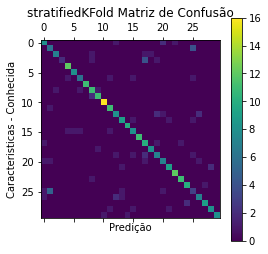

In [22]:
matrizConfusao2 = confusion_matrix(rotulos, predicao2)
plt.matshow(matrizConfusao2)
plt.ylabel('Caracteristicas - Conhecida')
plt.xlabel('Predição')
plt.title('stratifiedKFold Matriz de Confusão')
plt.colorbar()
plt.show()

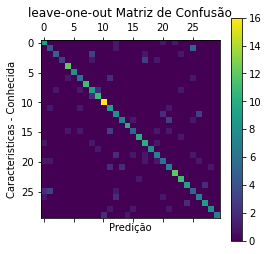

In [23]:
matrizConfusao3 = confusion_matrix(rotulos, predicao3)
plt.matshow(matrizConfusao3)
plt.ylabel('Caracteristicas - Conhecida')
plt.xlabel('Predição')
plt.title('leave-one-out Matriz de Confusão')
plt.colorbar()
plt.show()

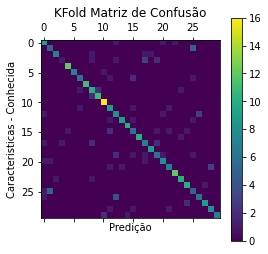

In [24]:
matrizConfusao4 = confusion_matrix(rotulos, predicao4)
plt.matshow(matrizConfusao4)
plt.ylabel('Caracteristicas - Conhecida')
plt.xlabel('Predição')
plt.title('KFold Matriz de Confusão')
plt.colorbar()
plt.show()